# The Visualization Of Gross Domestic Product And Life Expectancy

The comma-separated variable file contains data sourced from the [World Health organization (WHO)](https://apps.who.int/gho/data/node.main.688) and [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) .The data contained in the file is purposed to diclose the relationship between the `Gross Domestic Product (GDP)` and the `Life Expectancy` of six countries

#### Problem Understanding

Traditional economic theory posits a correlation between `Gross Domestic Product (GDP)` and `life expectancy`, rooted in the notion that increased financial resources enable individuals to access superior healthcare services and nutrition.

This relationship is based on the idea that higher `GDP` per capita generally translates to greater public and private investment in health infrastructure, improved living conditions, and enhanced social services, all of which contribute to better health outcomes and extended life expectancy for the population.

My intention is to investigate and scrutinize the data as an attempt to verify these preconcieved notions.


#### Import Python Libraries And Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import os

In [2]:
# Create a directory to save the graphs and load dataset
output_dir = 'graphs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
df = pd.read_csv('all_data.csv')

#### Dataset Overview

In [3]:
print('''\n Brief Overview Of The Structure Of The Dataframe:  
      ''')
print(df.head())

print('''\n The Datatypes Contained In The Dataframe:  
      ''')
print(df.info())

print('''\n Descriptive Analytics Of The Dataframe:  
      ''')
print(df.describe(include = "all"))



 Brief Overview Of The Structure Of The Dataframe:  
      
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10

 The Datatypes Contained In The Dataframe:  
      
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), in

<div class="alert alert-block alert-success" color: 'green'>
<b>Success:</b> The above operations have provided us with preliminary insight on the structure of the pandas dataframe we have created. However, some features need to be modified to allow for successful computations
</div>


#### Dataframe Transformation

In [4]:
# Dataframe transformation for improved readability
df.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'}, inplace=True)
df['Country'] = df['Country'].replace('United States of America', 'USA')

df['GDP'] = df['GDP'] / 1e9
df.rename(columns={'GDP': 'GDP (in billions)'}, inplace=True)
print(df.head())

  Country  Year  Life Expectancy  GDP (in billions)
0   Chile  2000             77.3          77.860932
1   Chile  2001             77.3          70.979924
2   Chile  2002             77.8          69.736811
3   Chile  2003             77.9          75.643460
4   Chile  2004             78.0          99.210393


<div class="alert alert-block alert-success" color: 'green'>
<b>Success:</b> We are now able to create visualizations efficiently
</div>


## Data Visualization

#### Time Series Analysis

In [5]:
countries = df['Country'].unique()

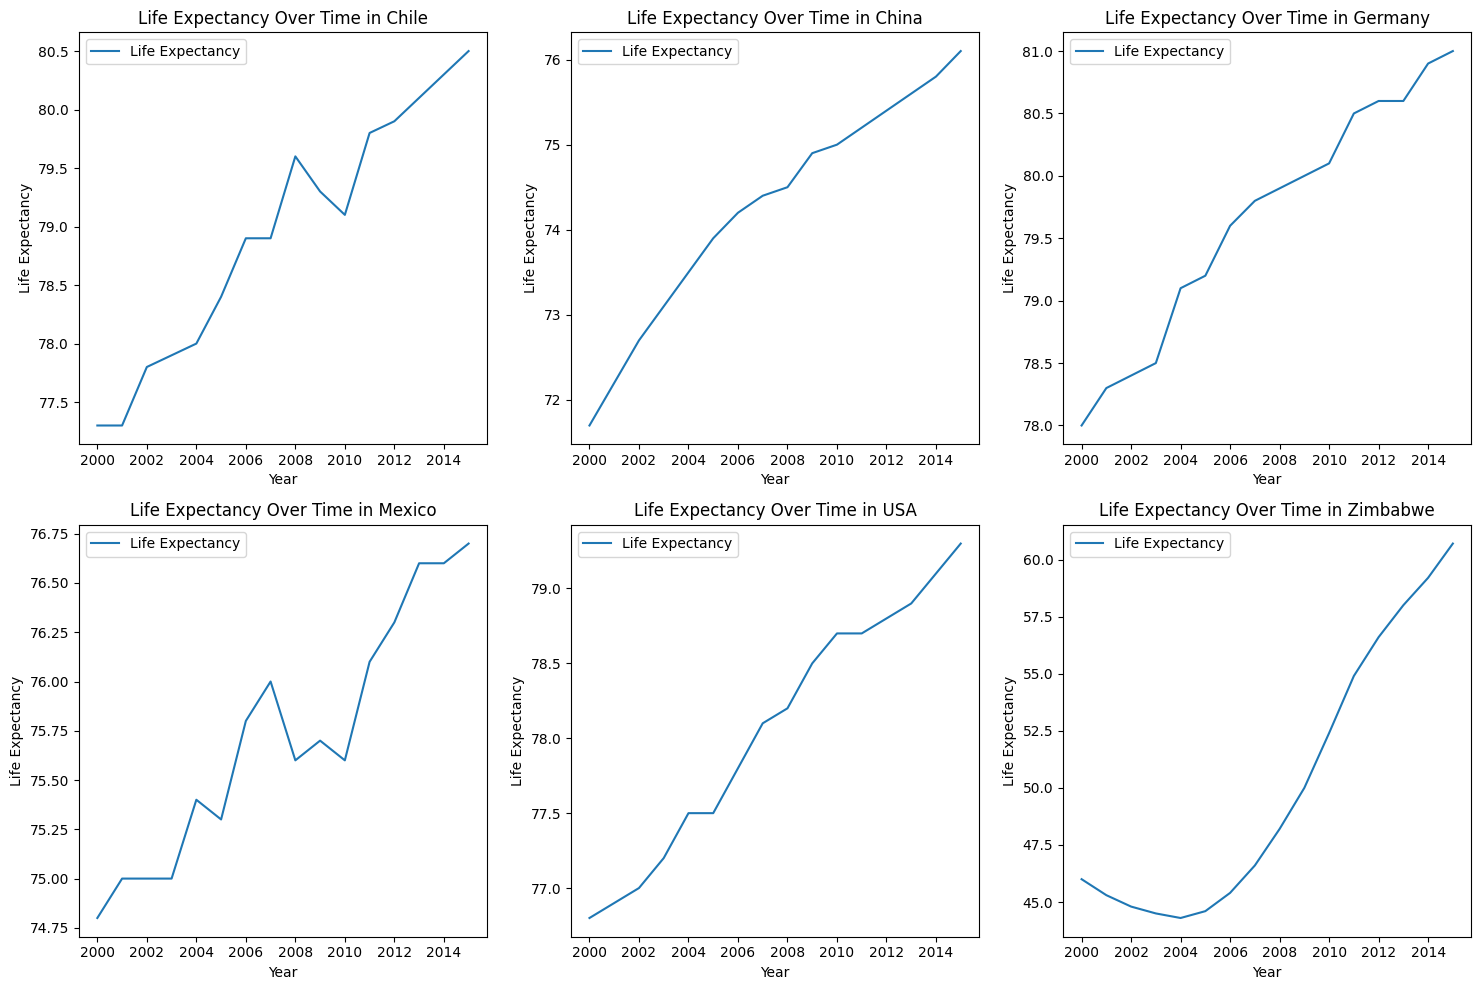

In [6]:
plt.figure(figsize=(15, 10))
for i, country in enumerate(countries, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, position i
    country_data = df[df['Country'] == country]
    sns.lineplot(x='Year', y='Life Expectancy', data=country_data, label='Life Expectancy')
    plt.title(f'Life Expectancy Over Time in {country}')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.legend()
plt.tight_layout()
plt.savefig(f'{output_dir}/line_chart_life_expectancy.png')  # Save the figure
plt.show()

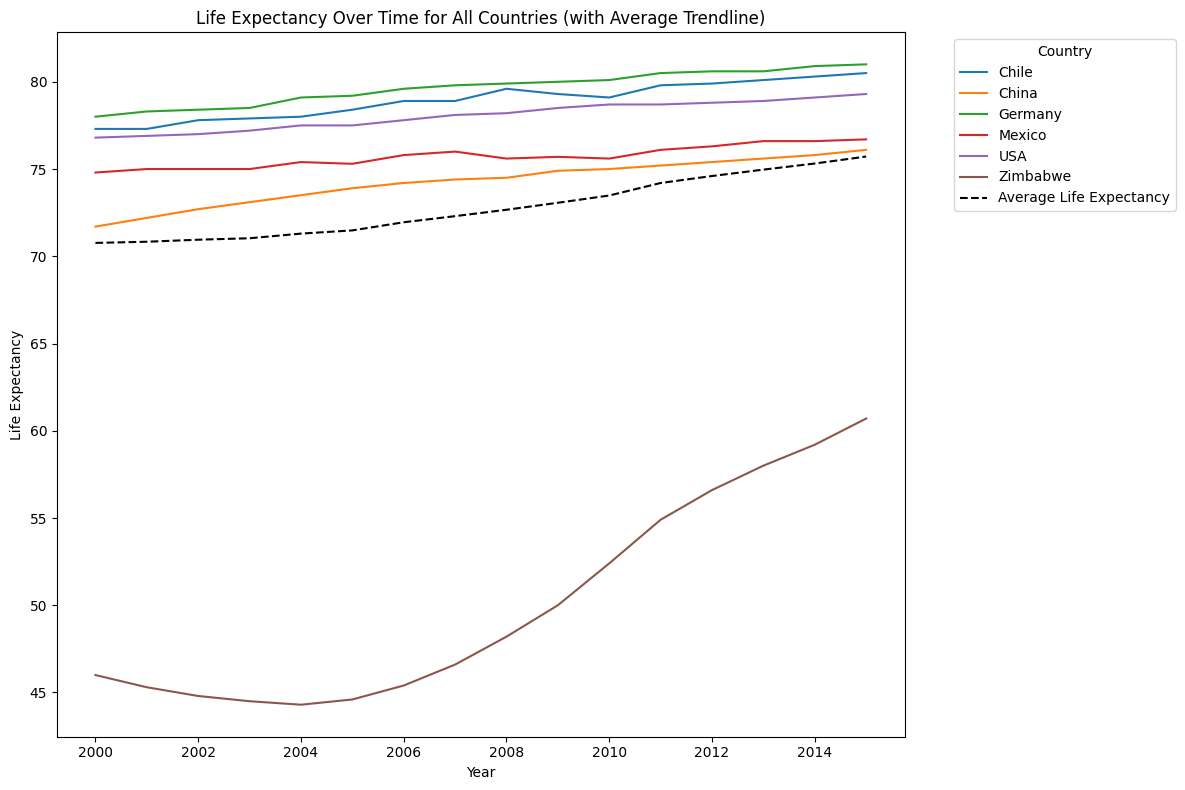

In [7]:
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = df[df['Country'] == country]
    sns.lineplot(x='Year', y='Life Expectancy', data=country_data, label=country)
    
average_life_expectancy = df.groupby('Year')['Life Expectancy'].mean()
# Calculate average Life Expectancy per year
sns.lineplot(x=average_life_expectancy.index, y=average_life_expectancy.values, color='black', linestyle='--', label='Average Life Expectancy')

plt.title('Life Expectancy Over Time for All Countries (with Average Trendline)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.savefig(f'{output_dir}/line_graph_life_expectancy_all_countries_with_trendline.png')
plt.show()

#### Time Series Interpretaion

[Life expectancy](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/lifeexpectancies/methodologies/periodandcohortlifeexpectancyexplained#:~:text=Life%20expectancy%20is%20a%20statistical,demographic%20factors%20including%20their%20sex) is a mathematical projection of the average time an individual is expected to live, based on their year of birth, present age, and other demographic characteristics, including their gender. Life expectancy is a key metric of a country's health, reflecting general death rates among its people. Declining life expectancy may indicate issues within a country's healthcare system.

The above visualizations clearly illustrate disparities between Zimbabwe and the rest of the countries. Zimbabwe's life expectancy has been trending below the overall average of the rest of the contries. Zimbabwe's life expectancy declined to its lowest point between the timeframe 2000-2009, when Zimbabweans were anticipated to live for up to 45.2 years. This was fueled by a decline in economic activity, hyperinflation, and an HIV/AIDS health crisis.

#### Time Series Of GDP Data

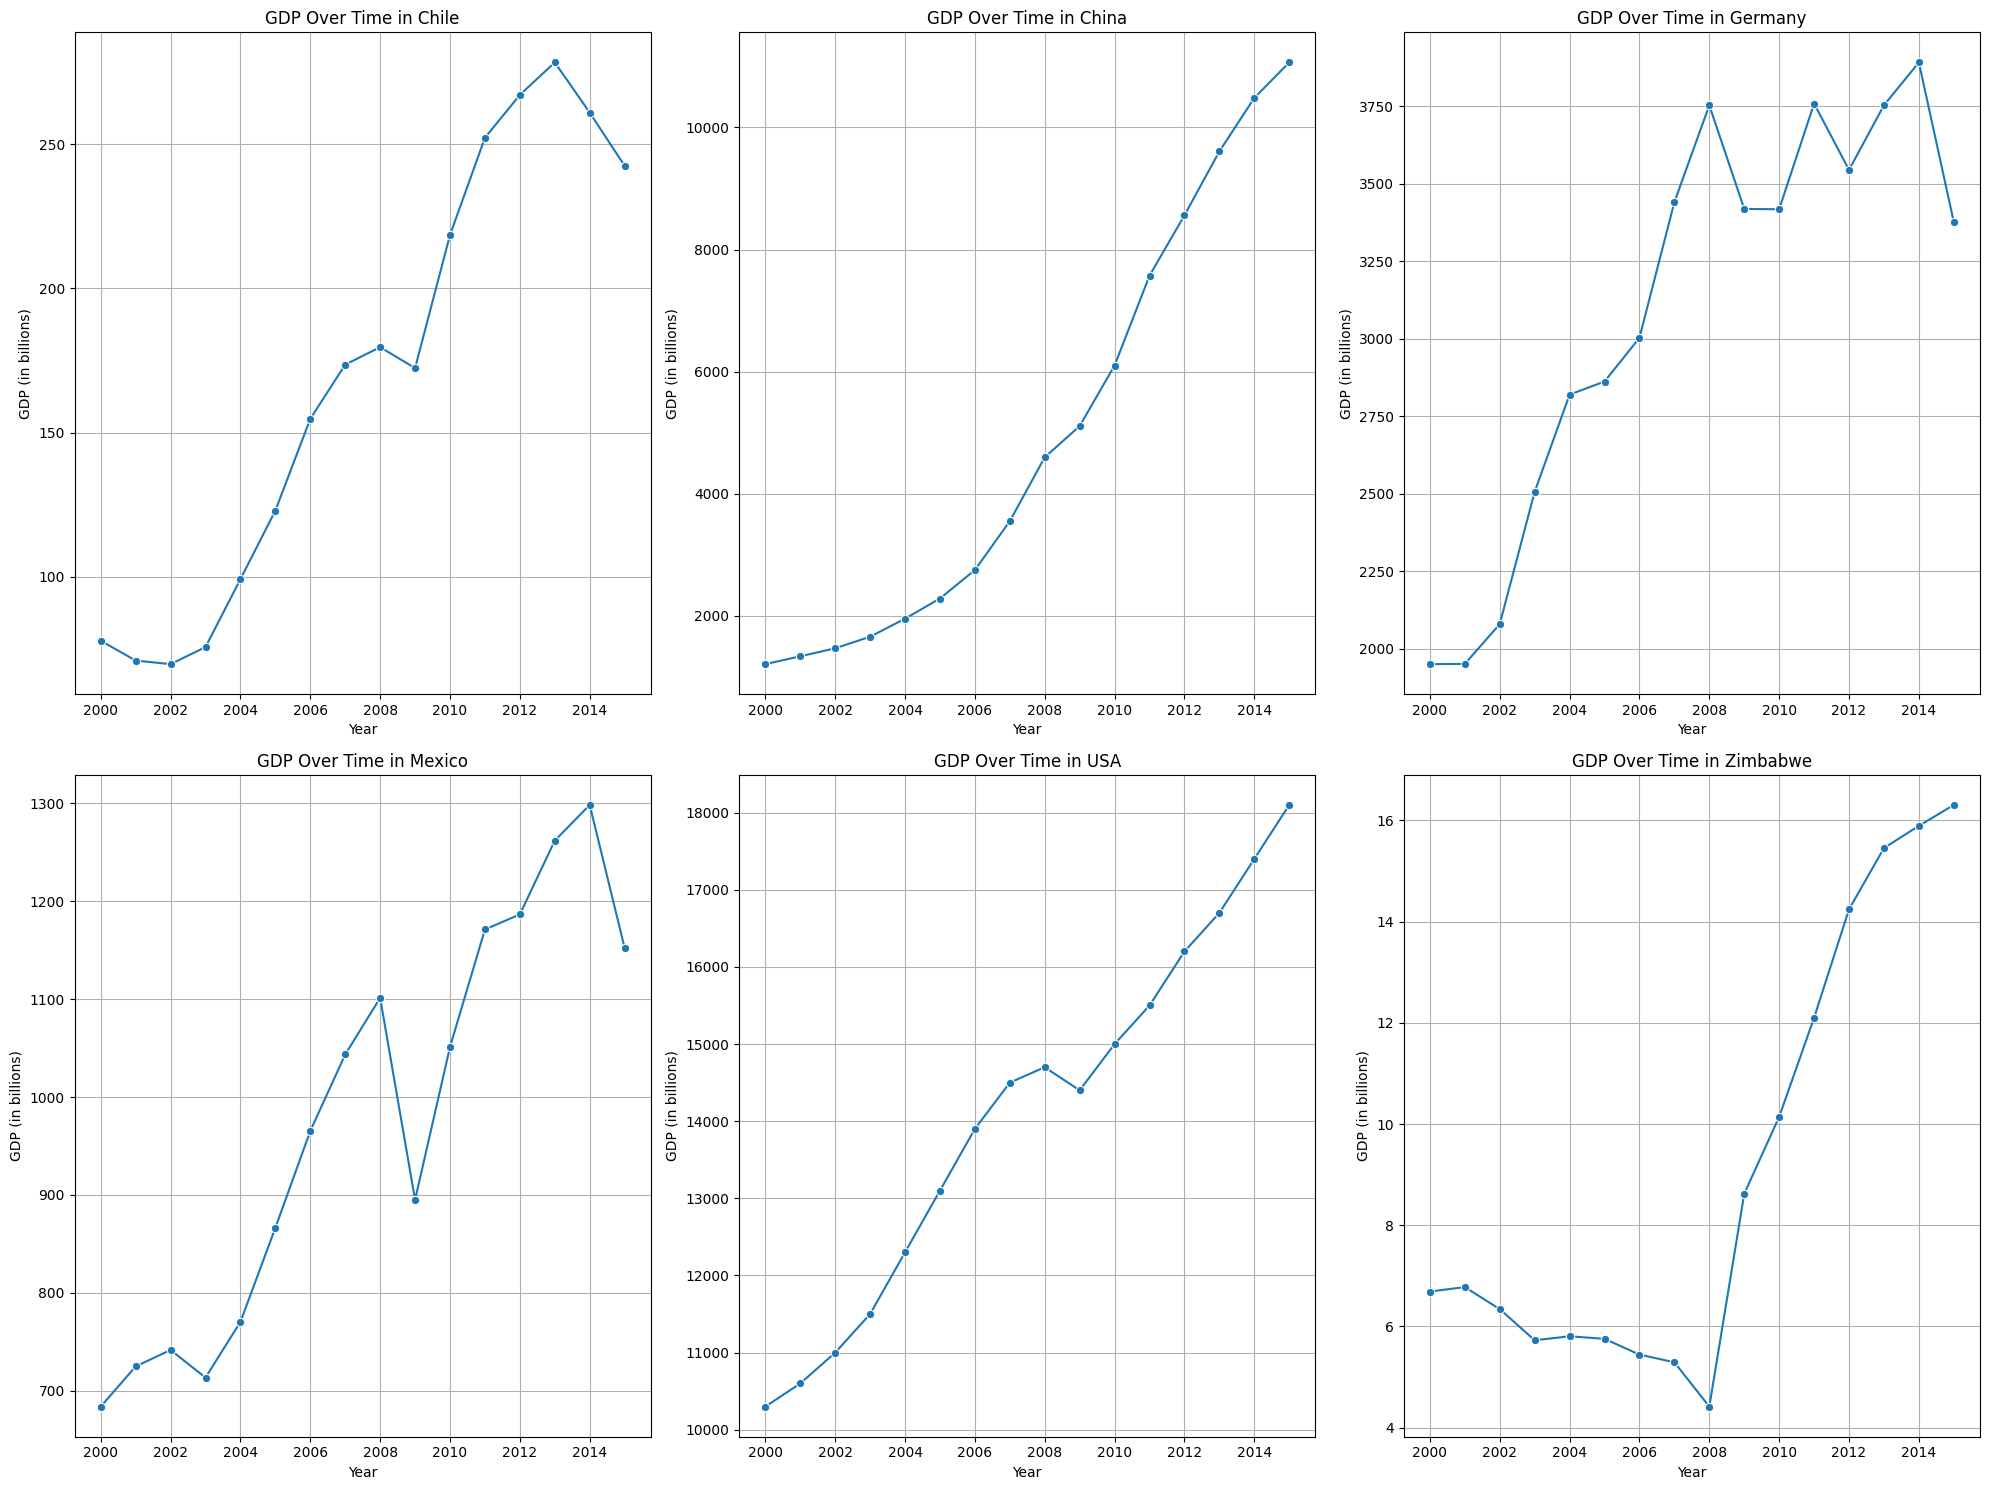

In [8]:
plt.figure(figsize=(20, 15))
for i, country in enumerate(countries, 1):
    plt.subplot(2, 3, i) 
    country_data = df[df['Country'] == country]
    sns.lineplot(x='Year', y='GDP (in billions)', data=country_data, marker='o')
    plt.title(f'GDP Over Time in {country}')
    plt.xlabel('Year')
    plt.ylabel('GDP (in billions)')
    plt.grid(True) 
plt.tight_layout()  
plt.savefig(f'{output_dir}/subplots_gdp_over_time_by_country.png') 
plt.show()

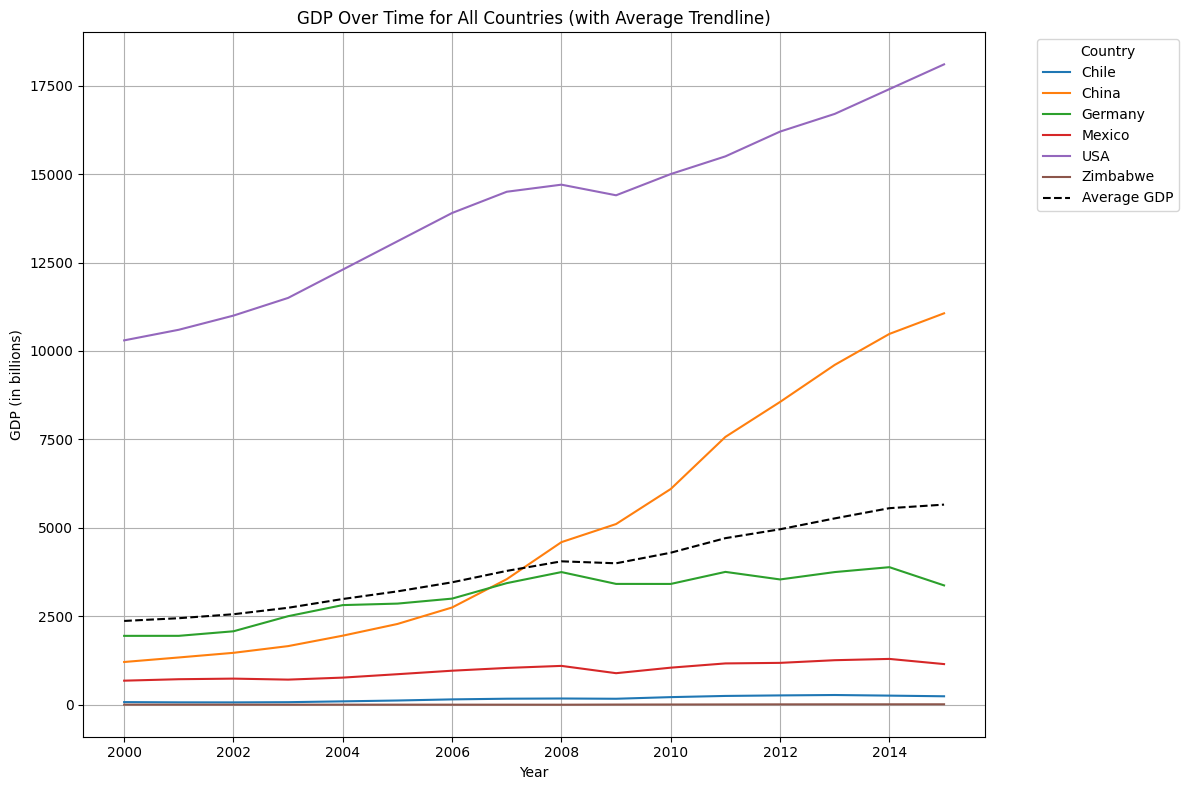

In [9]:
plt.figure(figsize=(12, 8))
for country in countries:
    country_data = df[df['Country'] == country]
    sns.lineplot(x='Year', y='GDP (in billions)', data=country_data, label=country)


average_gdp = df.groupby('Year')['GDP (in billions)'].mean()
sns.lineplot(x=average_gdp.index, y=average_gdp.values, color='black', linestyle='--', label='Average GDP')

plt.title('GDP Over Time for All Countries (with Average Trendline)')
plt.xlabel('Year')
plt.ylabel('GDP (in billions)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(True) 
plt.tight_layout()
plt.savefig(f'{output_dir}/line_chart_gdp_all_countries_with_trendline.png')
plt.show()

### Analysis Of The Relationship Of Bivariate Data

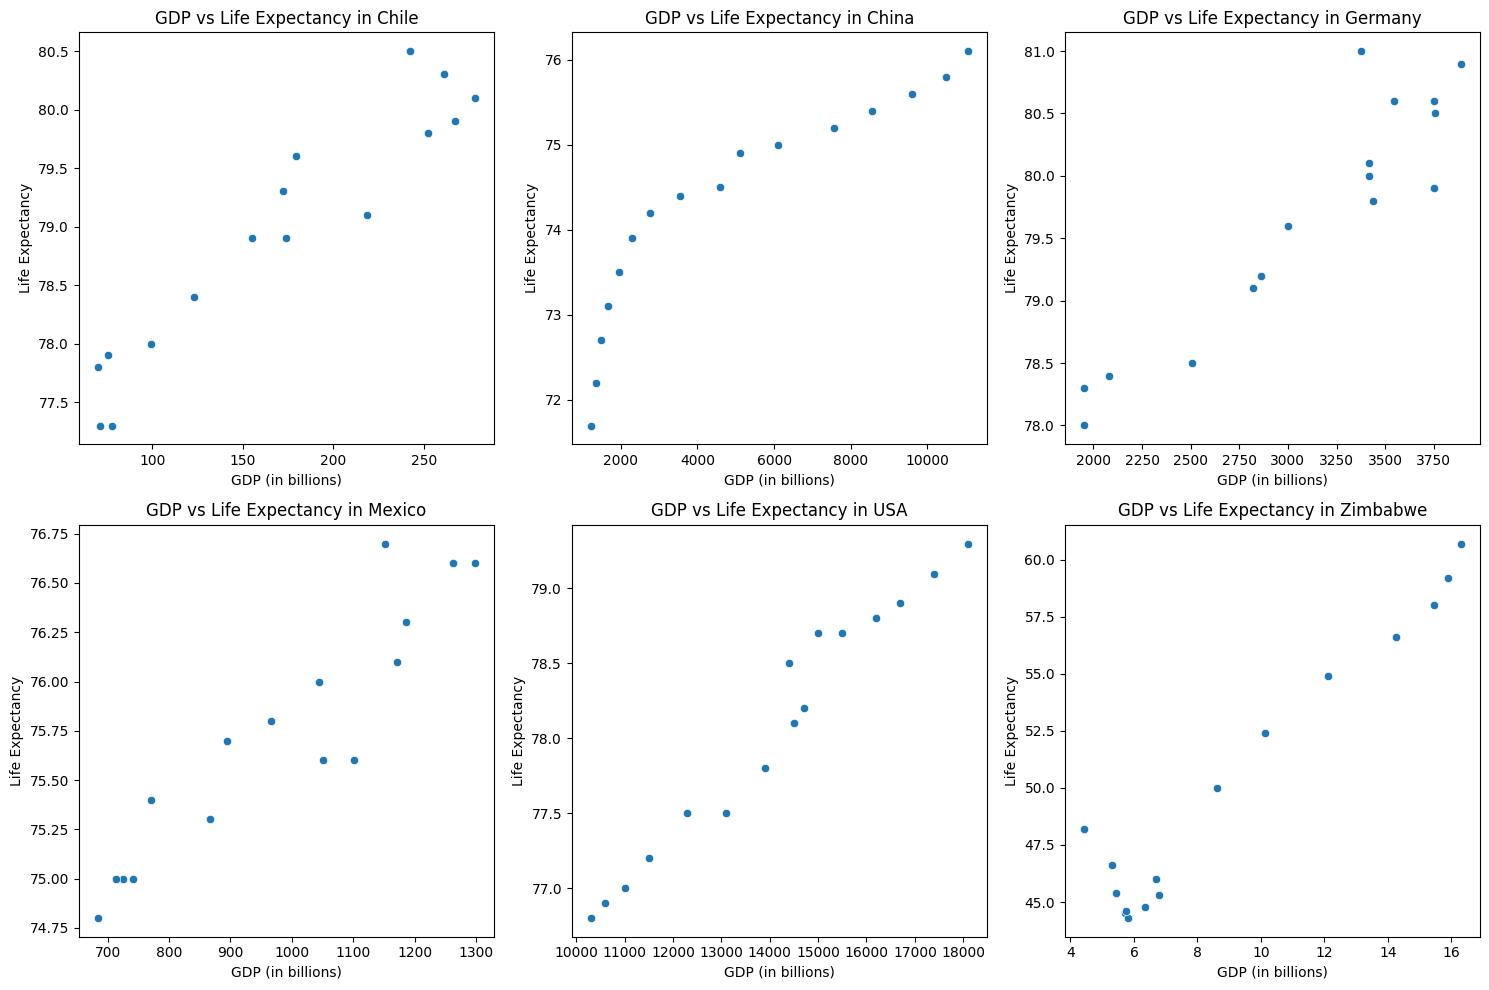

In [10]:
plt.figure(figsize=(15, 10))
for i, country in enumerate(countries, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, position i
    country_data = df[df['Country'] == country]
    sns.scatterplot(x='GDP (in billions)', y='Life Expectancy', data=country_data)
    plt.title(f'GDP vs Life Expectancy in {country}')
    plt.xlabel('GDP (in billions)')
    plt.ylabel('Life Expectancy')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig(f'{output_dir}/scatterplots_gdp_vs_life_expectancy.png')  # Save the figure
plt.show()

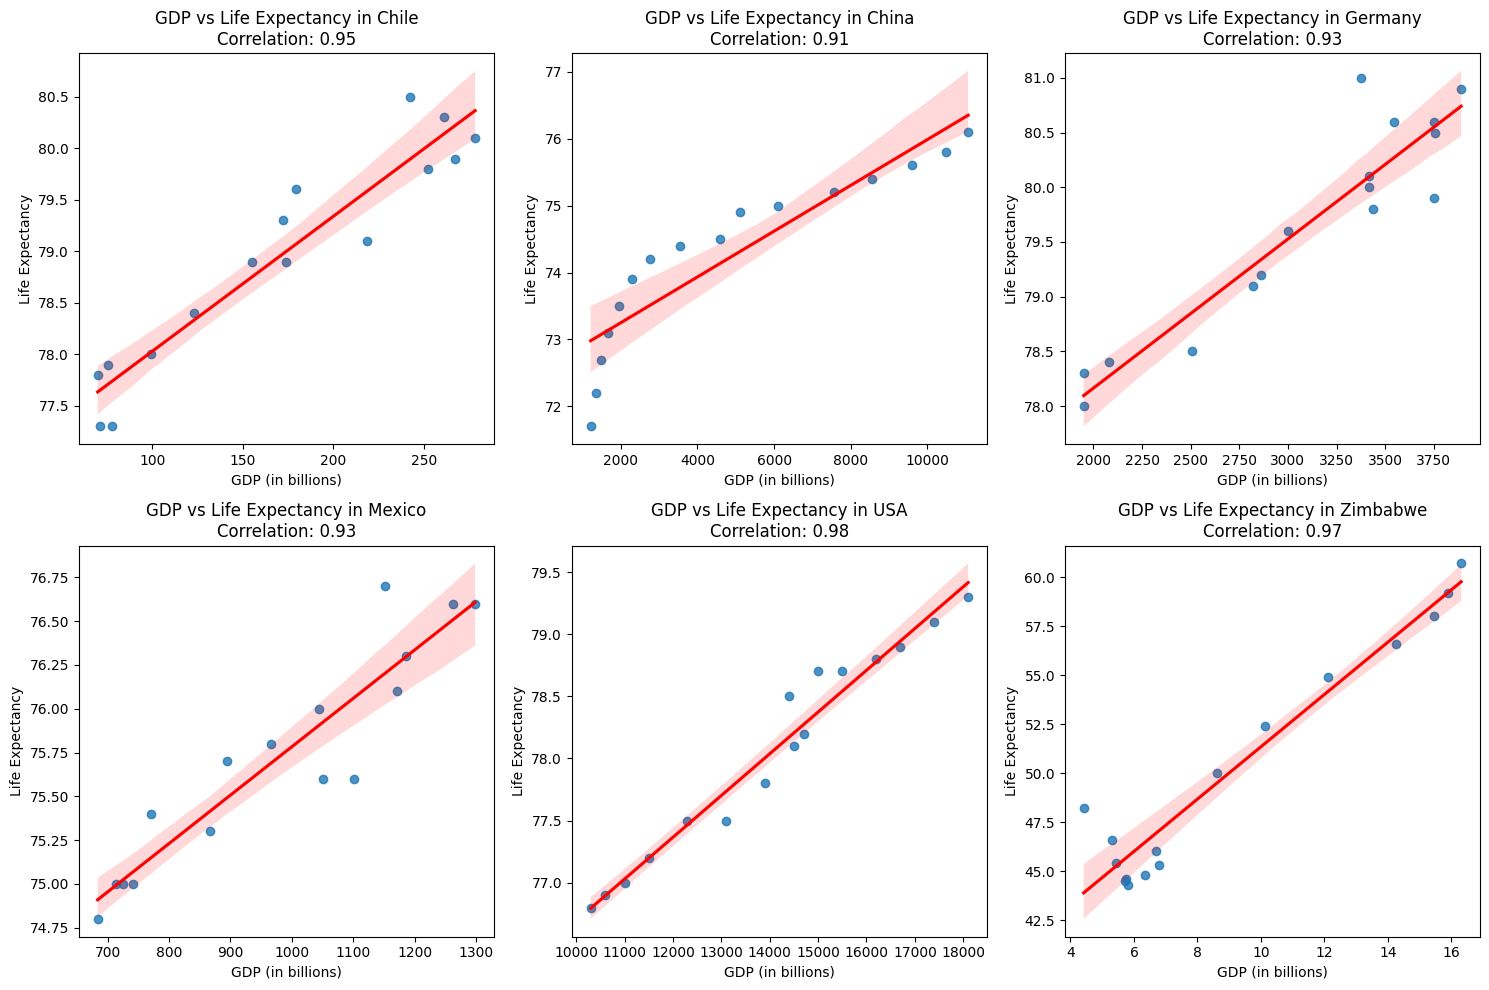

In [11]:
plt.figure(figsize=(15, 10))
for i, country in enumerate(countries, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, position i
    country_data = df[df['Country'] == country]
    
    # Calculate the Pearson correlation coefficient
    correlation, _ = pearsonr(country_data['GDP (in billions)'], country_data['Life Expectancy'])
    
    # Create the regression plot
    sns.regplot(x='GDP (in billions)', y='Life Expectancy', data=country_data, line_kws={'color': 'red'})
    plt.title(f'GDP vs Life Expectancy in {country}\nCorrelation: {correlation:.2f}')
    plt.xlabel('GDP (in billions)')
    plt.ylabel('Life Expectancy')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig(f'{output_dir}/regression_plots_gdp_vs_life_expectancy.png')  # Save the figure
plt.show()